In [ ]:
#| echo: false
from data import *
from utils import *
from model import *

In [ ]:
#| echo: false
plt.style.use('dark_background')

In [ ]:
#| echo: false
#| output: false
train_df = get_mnist_df()
valid_df = get_mnist_df(train=False)
train_dl, valid_dl = get_dls(train_df, valid_df, bs=64)
dls = DataLoaders(train_dl, valid_dl)
dls = dls.to('cuda')
train_df.shape, valid_df.shape, len(train_dl), len(valid_dl)

((60000, 2), (10000, 2), 938, 79)

In [ ]:
learner = Learner(dls, Autoencoder(), loss_func=MSELossFlat(), ).to_fp16()
learner.fine_tune(4, 3e-2)

epoch,train_loss,valid_loss,time
0,3397.903320,3260.815918,00:08


epoch,train_loss,valid_loss,time
0,3118.713135,3065.831299,00:09
1,2986.620361,2983.811035,00:09
2,2822.414795,2809.800293,00:09
3,2723.518799,2731.449707,00:09


### Lets take a quick look at a few reconstructed images

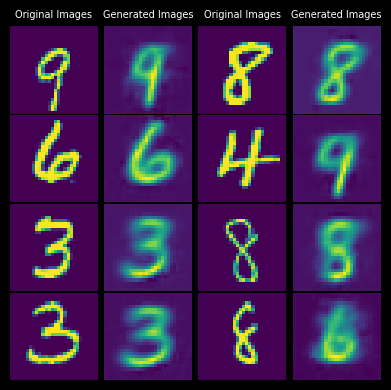

In [ ]:
plt_subs(*get_valid_results(learner.model, dls.train), size=2)

## Latent space exploration

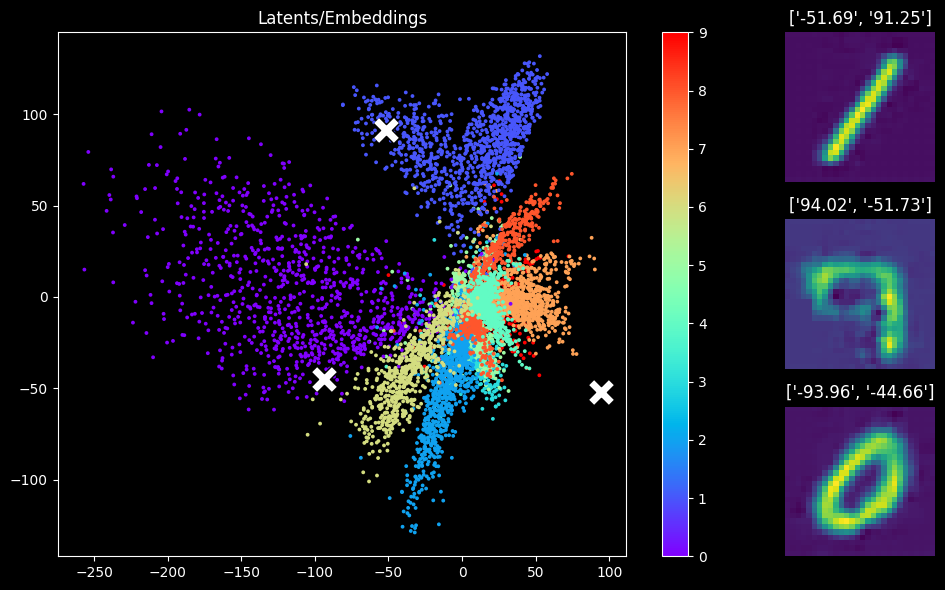

In [ ]:
#| fig-cap: "Figure 2: Validation Embedding Space and Three Latent Reconstructions"
#| fig-subcap:
#|   - "the model is able to map each number into it's own subspace -- some overlap considerably more than others"
plot_latent_regen(learner.model)